In [4]:
!pip install -q kaggle 


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!touch ~/.kaggle/kaggle.json

In [7]:
api_token = {"username":"gregorywmorris","key":"183d9667b643940f3d620d74aac1bfe2"}

In [8]:
import json 

with open('/root/.kaggle/kaggle.json','w') as file:
    json.dump(api_token,file)

In [9]:
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

100%|█████████████████████████████████████▉| 2.29G/2.29G [01:37<00:00, 27.0MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [01:37<00:00, 25.3MB/s]


In [30]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [14]:
import glob
import random
import matplotlib.pyplot as plt


def get_random_image(dir,condition):
    placeholder=''
    if condition in ['n','N']:
        placeholder='NORMAL'
    elif condition in ['p','P']:
        placeholder='PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
    folder=f'./data/chest_xray/{dir}/{placeholder}/*.jpeg'
    img_paths=glob.glob(folder)
    # different folders will have a different number of items
    max_length=len(img_paths)
    randomNumber=random.randint(0,max_length)
    
    for index, item in enumerate(img_paths, start=1):
        if index == randomNumber:
            print(index,item)
            image = plt.imread(item) #converts to array
            readyImage=plt.imshow(image) # generates image from an array
            plt.show()
            return readyImage

108 ./data/chest_xray/test/PNEUMONIA/person96_bacteria_465.jpeg


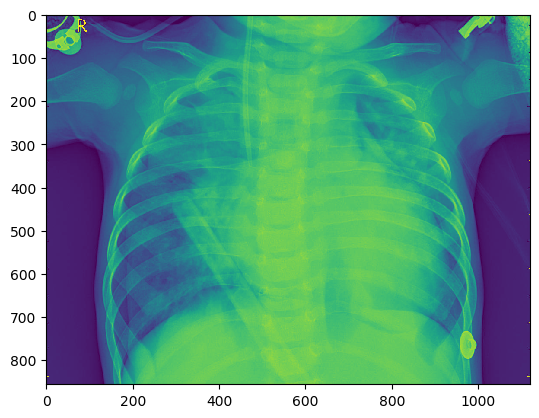

In [16]:
# note B&W image shows in virdis color format with matplotlib
get_random_image("test","P")

In [8]:
# RGBA has 4 dimessions compared to 3 in RGB. Common to png file types. Image classifier expects 3 dimensions.
# PIL is pillow, the python imaging library.
from PIL import Image

image = Image.open('globe-scene-fish-bowl-pngcrush.png')  
print(image.format)
print(image.size)
print(image.mode)

PNG
(393, 501)
RGBA


In [9]:
import PIL.Image

rgba_image=PIL.Image.open('globe-scene-fish-bowl-pngcrush.png')
rgb_image=rgba_image.convert('RGB')
print(rgb_image.mode)

RGB


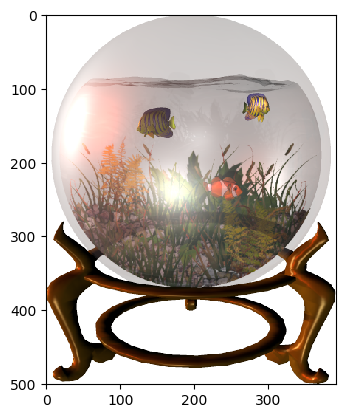

In [10]:
# matplotlib does not apply color coding to color images.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('globe-scene-fish-bowl-pngcrush.png')
imgplot = plt.imshow(img)
plt.show()

In [25]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

# converts images to 224 x 224
# Saves images in test, train, or val folder
# renames images to either test, train, or val + either normal or pneuomonia + numeric identifier
# specifies grey because these are grey images, omit if training on color images

folder=f'./data/chest_xray/train/*/*.jpeg'

# counter to incriment through the image numbers
counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

# normal images start with 'IM' and pneumonia start with 'person'
for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i) # will open as an array
        im=full_size_image.resize((224,224))
        # omit 'cmap='gray'' for color images
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

In [26]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/test/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

In [27]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/val/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

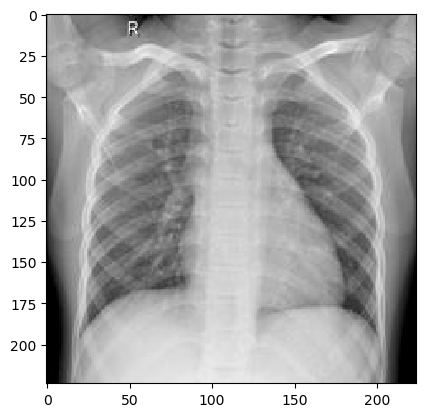

In [18]:
# Confirm images are now grey scale
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('data/chest_xray/train/train_normal0.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [29]:
# pneumonia and normal folders are manually deleted from the train/test/val folders

In [19]:
# create  a dataframe of all the files to use for vizualization
import glob
import pandas as pd

folder=f'./data/chest_xray/*/*.jpeg'

# lists to create dataframe
category=[]
filenames=[]
condition_of_lung=[]

all_files=glob.glob(folder)

# future consideration: can this be done with less repeating elifs?
for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")

all_data_df=pd.DataFrame({"dataset type":category,"x-ray result":condition_of_lung,"filename":filenames})

print(all_data_df.head())

  dataset type x-ray result                                       filename
0         test       normal       ./data/chest_xray/test/test_normal4.jpeg
1         test    pneumonia    ./data/chest_xray/test/test_pneumonia1.jpeg
2         test    pneumonia  ./data/chest_xray/test/test_pneumonia359.jpeg
3         test    pneumonia  ./data/chest_xray/test/test_pneumonia197.jpeg
4         test       normal     ./data/chest_xray/test/test_normal103.jpeg


In [20]:
# validate data frame by looking at first item in each list
print(category[0])
print(condition_of_lung[0])
print(filenames[0])

test
normal
./data/chest_xray/test/test_normal4.jpeg


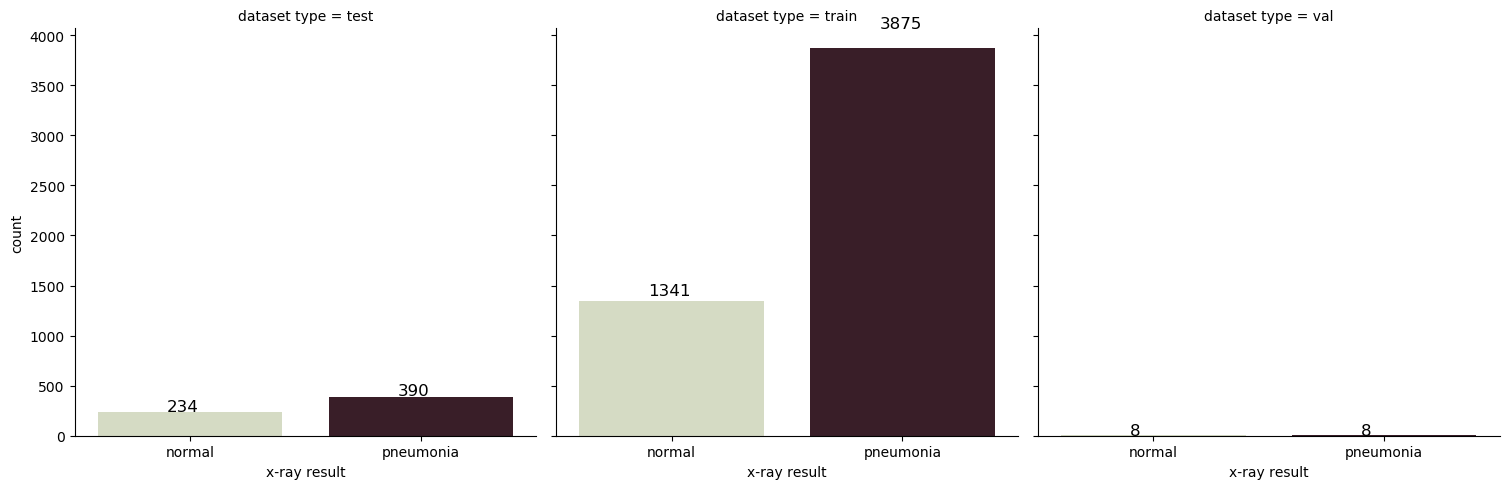

In [21]:
import seaborn as sns

g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)

for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')
        
plt.show()

In [33]:
# create dataframe to convert to lst files
# lst documentation: https://docs.aws.amazon.com/sagemaker/latest/dg/image-classification.html
import glob
import pandas as pd
import os

train_folder='./data/chest_xray/train/*.jpeg'
# index does not have to be specified because pandas provides that
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
train_imgs_path=glob.glob(train_folder)

counter=0
class_arg=' '

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    # base name gives filename rather than the whole path
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(train_df_lst.head())

  labels                   s3_path
0      0     train_normal1203.jpeg
1      1  train_pneumonia3349.jpeg
2      1   train_pneumonia478.jpeg
3      1  train_pneumonia1567.jpeg
4      1  train_pneumonia2296.jpeg


In [34]:
import glob
import pandas as pd
import os
test_folder='./data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
test_imgs_path=glob.glob(test_folder)
counter=0
class_arg=''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(test_df_lst.head())

  labels                 s3_path
0      0       test_normal4.jpeg
1      1    test_pneumonia1.jpeg
2      1  test_pneumonia359.jpeg
3      1  test_pneumonia197.jpeg
4      0     test_normal103.jpeg


In [35]:
# create lst files. Because they are made from dataframes we can use to_csv method.
def save_to_lst(df,prefix):
    return df[["labels","s3_path"]].to_csv(
    f"{prefix}.lst", sep='\t',index=True,header=False
    )

save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")

In [36]:
bucket='medical-ai-chest-xray-gm'
print("bucket:{}".format(bucket))
region='us-east-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::medical-ai-chest-xray-gm'
print("roleArn:{}".format(roleArn))


bucket:medical-ai-chest-xray-gm
region:us-east-1
roleArn:arn:aws:s3:::medical-ai-chest-xray-gm


In [37]:
import os

os.environ["DEFAULT_S3_BUCKET"]=bucket


In [18]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/

upload: data/chest_xray/train/.ipynb_checkpoints/train_normal0-checkpoint.jpeg to s3://medical-ai-chest-xray-gm/train/.ipynb_checkpoints/train_normal0-checkpoint.jpeg
upload: data/chest_xray/train/train_normal10.jpeg to s3://medical-ai-chest-xray-gm/train/train_normal10.jpeg
upload: data/chest_xray/train/train_normal1.jpeg to s3://medical-ai-chest-xray-gm/train/train_normal1.jpeg
upload: data/chest_xray/train/train_normal0.jpeg to s3://medical-ai-chest-xray-gm/train/train_normal0.jpeg
upload: data/chest_xray/train/train_normal1004.jpeg to s3://medical-ai-chest-xray-gm/train/train_normal1004.jpeg
upload: data/chest_xray/train/train_normal100.jpeg to s3://medical-ai-chest-xray-gm/train/train_normal100.jpeg
upload: data/chest_xray/train/train_normal1007.jpeg to s3://medical-ai-chest-xray-gm/train/train_normal1007.jpeg
upload: data/chest_xray/train/train_normal1005.jpeg to s3://medical-ai-chest-xray-gm/train/train_normal1005.jpeg
upload: data/chest_xray/train/train_normal1001.jpeg to s3://

In [19]:
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/

upload: data/chest_xray/test/test_normal0.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal0.jpeg
upload: data/chest_xray/test/test_normal1.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal1.jpeg
upload: data/chest_xray/test/test_normal105.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal105.jpeg
upload: data/chest_xray/test/test_normal101.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal101.jpeg
upload: data/chest_xray/test/test_normal102.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal102.jpeg
upload: data/chest_xray/test/test_normal10.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal10.jpeg
upload: data/chest_xray/test/test_normal108.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal108.jpeg
upload: data/chest_xray/test/test_normal110.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal110.jpeg
upload: data/chest_xray/test/test_normal100.jpeg to s3://medical-ai-chest-xray-gm/test/test_normal100.jpeg
upload: data/chest_xray/test/test_normal103.jpe

In [39]:
import boto3

boto3.Session().resource('s3').Bucket(bucket).Object("train.lst").upload_file('./train.lst')

In [40]:

boto3.Session().resource('s3').Bucket(bucket).Object("test.lst").upload_file('./test.lst')

# Run next two cells on Sagemaker Restart

In [22]:
# Code only needed for stoping and restarting SageMaker

bucket='medical-ai-chest-xray-gm'
print("bucket:{}".format(bucket))
region='us-east-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::medical-ai-chest-xray-gm'
print("roleArn:{}".format(roleArn))



bucket:medical-ai-chest-xray-gm
region:us-east-1
roleArn:arn:aws:s3:::medical-ai-chest-xray-gm


In [23]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role

sess=sagemaker.Session()

# call aws docker image for the classification model
algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location=f"s3://{bucket}/models/image_model"
print(algorithm_image)

811284229777.dkr.ecr.us-east-1.amazonaws.com/image-classification:1


In [24]:
role=get_execution_role()
print(role)

arn:aws:iam::066243913450:role/service-role/AmazonSageMaker-ExecutionRole-20230408T094364


In [27]:
# specifications for our model
import sagemaker
img_classifier_model=sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type="ml.p2.xlarge", # gpu instance denoted by the 'p'
    volume_size=50, # EBS volume in GB
    max_run=432000, # training job max run time in seconds
    input_mode="File", # local directory. 'Pipe mode' can stream from s3 rahter than copy, but requires a different data type (image format protobuf)
    output_path=s3_output_location,
    sagemaker_session=sess
)

print(img_classifier_model)

In [28]:
import glob 
count=0

for filepath in glob.glob('./data/chest_xray/train/*.jpeg'):
    count+=1
print(count)

5216


In [30]:
count=5216

In [33]:
img_classifier_model.set_hyperparameters(
image_shape='3,224,224', # this is actually a 2 dimensional gray scale, sagemaker adds a dimension for ML fitting
num_classes=2,
use_pretrained_model=1,
num_training_samples=count,
augmentation_type='crop_color_transform', # helps reduce overfitting. applies random augmentations to the images
epochs=15, # to save on time and money. 50 epochs would be optimal
early_stopping=True,
early_stopping_min_epochs=8, # 50-75%
early_stopping_tolerance=0.0,
early_stopping_patience=5, # if no imporvment within this number, training stops.
lr_scheduler_factor=0.1, # step reduciton
lr_scheduler_step='8,10,12'
)

In [34]:
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner

hyperparameter_ranges={
    "learning_rate":ContinuousParameter(0.01,0.1), # continuous params must have a lower and upper bound
    "mini_batch_size":CategoricalParameter([8,16,32]), # categorical params must be given in a list. Current list is ideal for memory usage and model updating.
    "optimizer":CategoricalParameter(["sgd","adam"]) # improved gradient descent
}

In [39]:
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=5
max_parallel_jobs=1 # fewer parrallel jobs will allow for better Baysian search. 

In [40]:
# see previous two cells
tuner=HyperparameterTuner(estimator=img_classifier_model,
                         objective_metric_name=objective_metric_name,
                         hyperparameter_ranges=hyperparameter_ranges,
                         objective_type=objective_type,
                         max_jobs=max_jobs,
                         max_parallel_jobs=max_parallel_jobs  
                         )

In [41]:
from sagemaker.session import TrainingInput

# boilerplate code with our data location
model_inputs={
    "train":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train/",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test/",content_type="application/x-image"), # SageMaker uses ther term 'validation' for test
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train.lst",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test.lst",content_type="application/x-image"),
}

In [42]:
import time 

# create unique job names using timestamp
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp

`No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config` - can be ignored, due to the training happening outside of the notebook.

In [43]:
tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

SageMaker-> Training->Hyperparamerter tuning jobs -> Best training job

Will give the parameter for the best training. Correcting parameters to this and retraining will yield better results.

In [43]:
import sagemaker
from sagemaker import get_execution_role

In [44]:
role=get_execution_role()

In [47]:
model=sagemaker.model.Model(
image_uri=algorithm_image,
# best model as determined in Sagemaker-Training and pulled from S3 bucket (S3 URI from within model.tar.gz)
model_data='s3://medical-ai-chest-xray-gm/models/image_model/classifier-2023-04-10-13-17-00-002-e82abc29/output/model.tar.gz',
role=role)

Sagemaker->Inference->Endpoints 

In [49]:
endpoint_name='demo-pneumonia-classifier-gm'

deployment=model.deploy(
initial_instance_count=1,
instance_type='ml.m4.xlarge',
endpoint_name=endpoint_name)

--------------!

In [50]:
from sagemaker.predictor import Predictor
predictor=Predictor("demo-pneumonia-classifier-gm")

In [51]:
from sagemaker.serializers import IdentitySerializer
import base64

file_name='data/chest_xray/val/val_pneumonia0.jpeg'

predictor.serializer= IdentitySerializer("image/jpeg")
with open(file_name,"rb")as f:
    payload=f.read()
    
inference=predictor.predict(data=payload)
print(inference)
# predictions is [ non-pneumonia probability, pneumonia probabilty]

b'[0.03306444734334946, 0.9669355750083923]'


In [55]:
# byte array needs to be deserialized
print(f'Expect [0.03306444734334946, 0.9669355750083923] but get [{inference[0]},{inference[1]}]')

Expect [0.03306444734334946, 0.9669355750083923] but get [91,48]


In [59]:
import glob
import json
import numpy as np

file_path='data/chest_xray/val/*.jpeg'
files=glob.glob(file_path)

y_true=[]
y_pred=[]

def make_pred():
    for file in files:
        if "normal" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                # deserialize the array with json
                result=json.loads(inference)
                # argmax provides the argument with the highest probability
                predicted_class=np.argmax(result)
                y_true.append(0)
                y_pred.append(predicted_class)
        elif "pneumonia" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(1)
                y_pred.append(predicted_class)

make_pred()
print(y_true)
print(y_pred)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]


In [74]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[4, 4],
       [1, 7]])

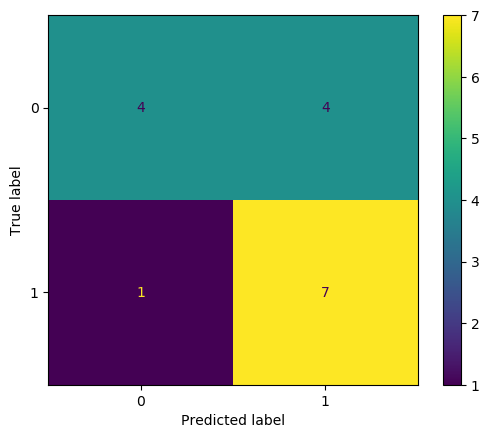

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='viridis')

plt.show()
# it's important to minimize false negatives (bottom left) for healthcare descisions.

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))
# average and weighted average are the same becasue the comparison set is balanced

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.64      0.88      0.74         8

    accuracy                           0.69        16
   macro avg       0.72      0.69      0.68        16
weighted avg       0.72      0.69      0.68        16



# Endpoint Redeploy

In [2]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
import sagemaker
from sagemaker import get_execution_role

bucket='medical-ai-chest-xray-gm'
print("bucket:{}".format(bucket))
region='us-east-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::medical-ai-chest-xray-gm'
print("roleArn:{}".format(roleArn))


sess=sagemaker.Session()

# call aws docker image for the classification model
algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location=f"s3://{bucket}/models/image_model"
print(algorithm_image)

role=get_execution_role()

model=sagemaker.model.Model(
image_uri=algorithm_image,
# best model as determined in Sagemaker-Training and pulled from S3 bucket (S3 URI from within model.tar.gz)
model_data='s3://medical-ai-chest-xray-gm/models/image_model/classifier-2023-04-10-13-17-00-002-e82abc29/output/model.tar.gz',
role=role)

endpoint_name='demo-pneumonia-classifier-gm'

deployment=model.deploy(
initial_instance_count=1,
instance_type='ml.m4.xlarge',
endpoint_name=endpoint_name)
print('endpoint deployed')

bucket:medical-ai-chest-xray-gm
region:us-east-1
roleArn:arn:aws:s3:::medical-ai-chest-xray-gm
811284229777.dkr.ecr.us-east-1.amazonaws.com/image-classification:1
-

KeyboardInterrupt: 